# How To Earn A Higher Salary

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/survey_results_public.csv')

In [27]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [28]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [29]:
df.select_dtypes(['number']).head()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,1,NaN,NaN,NaN,NaN,14.0
1,2,NaN,NaN,NaN,NaN,19.0
2,3,23000.0,8820.0,40.0,NaN,28.0
3,4,61000.0,61000.0,80.0,NaN,22.0
4,5,NaN,NaN,55.0,NaN,30.0


In [30]:
df['ConvertedComp'].median()

57287.0

## Education Level

In [31]:
df['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [32]:
df.loc[:, ['EdLevel','ConvertedComp']].groupby(by='EdLevel').median().sort_values('ConvertedComp', ascending=False)

,ConvertedComp
EdLevel,
"Other doctoral degree (Ph.D, Ed.D., etc.)",81960.0
"Bachelor’s degree (BA, BS, B.Eng., etc.)",60000.0
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",57744.0
Associate degree,56092.5
I never completed any formal education,53562.0
Some college/university study without earning a degree,52476.0
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",37128.0
Primary/elementary school,34368.0
"Professional degree (JD, MD, etc.)",32998.0


## Country

In [33]:
country_list = df['Country'].value_counts()[df['Country'].value_counts()>1000]

In [34]:
list(country_list.index)

['United States',
 'India',
 'Germany',
 'United Kingdom',
 'Canada',
 'France',
 'Brazil',
 'Poland',
 'Australia',
 'Netherlands',
 'Russian Federation',
 'Spain',
 'Italy',
 'Sweden']

In [35]:
df[df['Country'].isin(list(country_list.index))][['Country', 'ConvertedComp']].groupby('Country').median().sort_values('ConvertedComp', ascending=False)

,ConvertedComp
Country,
United States,110000.0
Australia,79783.0
Canada,68705.0
United Kingdom,68041.0
Germany,63016.0
Netherlands,57287.0
Sweden,56004.0
France,46752.0
Spain,40101.0


## Work Week Hours

In [36]:
df['WorkWeekHrs'].value_counts().head()

40.0    30131
45.0     6352
50.0     4656
35.0     3159
37.5     1662
Name: WorkWeekHrs, dtype: int64

In [37]:
def trans_hours_to_scope(hour):
    if hour < 10:
        return 'less than 10'
    elif 10 <= hour < 50:
        return '10-50'
    elif 50 <= hour < 100:
        return '50-100'
    elif 100 <= hour < 150:
        return '100-150'
    elif 150 <= hour < 168:
        return '150-168'
df['WorkWeekHrsScope'] = df['WorkWeekHrs'].apply(trans_hours_to_scope)
df[df['WorkWeekHrs']<168].loc[:, ['WorkWeekHrsScope', 'ConvertedComp']].dropna(how='any', axis=0).groupby(by='WorkWeekHrsScope').median().sort_values('ConvertedComp', ascending=False)

,ConvertedComp
WorkWeekHrsScope,
50-100,67884.0
10-50,57600.0
150-168,28212.0
100-150,26724.0
less than 10,11961.0


## Gender

In [38]:
df['Gender'].value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [39]:
df[df['Gender'].isin(['Man', 'Woman'])].loc[:, ['Gender','ConvertedComp']].groupby(by='Gender').median().sort_values('ConvertedComp', ascending=False)

,ConvertedComp
Gender,
Woman,57532.0
Man,57254.0


## Work Remote

In [40]:
df['WorkRemote'].value_counts()

Less than once per month / Never                           30220
A few days each month                                      17242
All or almost all the time (I'm full-time remote)           8465
Less than half the time, but at least one day each week     6320
It's complicated                                            3675
More than half, but not all, the time                       2376
About half the time                                         1986
Name: WorkRemote, dtype: int64

In [41]:
df.loc[:, ['WorkRemote','ConvertedComp']].groupby(by='WorkRemote').median().sort_values('ConvertedComp', ascending=False)

,ConvertedComp
WorkRemote,
"Less than half the time, but at least one day each week",75000.0
All or almost all the time (I'm full-time remote),71037.5
A few days each month,65976.0
About half the time,58881.0
"More than half, but not all, the time",58800.0
Less than once per month / Never,47436.0
It's complicated,38952.0


In [42]:
df.loc[:, ['WorkLoc','ConvertedComp']].groupby(by='WorkLoc').median().sort_values('ConvertedComp', ascending=False)

,ConvertedComp
WorkLoc,
Home,61071.0
Office,55536.0
"Other place, such as a coworking space or cafe",48097.0


In [43]:
df['CompTotal'].head()

0        NaN
1        NaN
2    23000.0
3    61000.0
4        NaN
Name: CompTotal, dtype: float64

## Organization Size

In [44]:
df.loc[:, ['OrgSize','ConvertedComp']].groupby(by='OrgSize').median().sort_values('ConvertedComp', ascending=False)

,ConvertedComp
OrgSize,
"10,000 or more employees",82188.0
"5,000 to 9,999 employees",68745.0
"1,000 to 4,999 employees",66000.0
500 to 999 employees,60722.5
"Just me - I am a freelancer, sole proprietor, etc.",60000.0
100 to 499 employees,59292.0
20 to 99 employees,50000.0
10 to 19 employees,41871.0
2-9 employees,37810.0


## Language Worked With

In [45]:
from collections import defaultdict
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [46]:
possible_vals = []
for cols in df['LanguageWorkedWith']:
    for c in str(cols).split(';'):
        if c not in possible_vals:
            possible_vals.append(c)
print(possible_vals)

['HTML/CSS', 'Java', 'JavaScript', 'Python', 'C++', 'C', 'C#', 'SQL', 'VBA', 'R', 'Bash/Shell/PowerShell', 'Ruby', 'Rust', 'TypeScript', 'WebAssembly', 'Other(s):', 'Go', 'PHP', 'Assembly', 'Kotlin', 'Swift', 'nan', 'Objective-C', 'Elixir', 'Erlang', 'Clojure', 'F#', 'Scala', 'Dart']


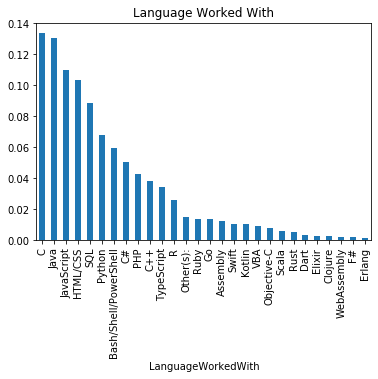

In [47]:
def clean_and_plot(df, title='Language Worked With', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['LanguageWorkedWith'].value_counts().reset_index()
    study.rename(columns={'index': 'LanguageWorkedWith', 'LanguageWorkedWith': 'count'}, inplace=True)
    study_df = total_count(study, 'LanguageWorkedWith', 'count', possible_vals)
    study_df.set_index('LanguageWorkedWith', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

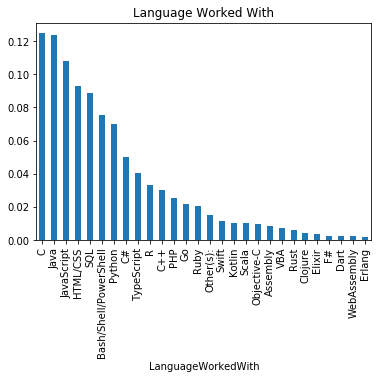

In [48]:
high_salary_df = clean_and_plot(df[df['ConvertedComp'] > 100000])